# Heatmap of top 100 common features across environments

Input:
- rrBLUP coefficient files for each environment (35 files total)
- RF importance score files for each environment (35 files total)

Requirements:
- Python 3.9

cmd+shift+space to see function parameters

In [1]:
import os
import datatable as dt
import pandas as pd

envs = ["YPACETATE", "YPD14", "YPD40", "YPD42", "YPD6AU", "YPDANISO10", 
"YPDANISO20", "YPDANISO50", "YPDBENOMYL200", "YPDBENOMYL500", "YPDCAFEIN40", 
"YPDCAFEIN50", "YPDCHX05", "YPDCHX1", "YPDCUSO410MM", "YPDDMSO", "YPDETOH", 
"YPDFLUCONAZOLE", "YPDFORMAMIDE4", "YPDFORMAMIDE5", "YPDHU", "YPDKCL2M", 
"YPDLICL250MM", "YPDMV", "YPDNACL15M", "YPDNACL1M", "YPDNYSTATIN", "YPDSDS", 
"YPDSODIUMMETAARSENITE", "YPETHANOL", "YPGALACTOSE", "YPRIBOSE", "YPGLYCEROL", 
"YPXYLOSE", "YPSORBITOL"]

# Growth Conditions and Descriptions
# growth temperature is 30C if not specified
cond = {"YPDKCL2M":"YPD KCL 2M", "YPGALACTOSE":"YP Galactose 2%", "YPD40":"YPD 40C", 
"YPDCHX05":"YPD Cycloheximide 0.5µg/ml", "YPDLICL250MM":"YPD LiCl 250mM", 
"YPGLYCEROL":"YP Glycerol 2%", "YPD42":"YPD 42C", "YPDCHX1":"YPD Cycloheximide 1µg/ml", 
"YPDMV":"YPD Methylviologen 20mM", "YPRIBOSE":"YP Ribose 2%", "YPD6AU":"YPD 6-Azauracile 600µg/ml", 
"YPDCUSO410MM":"YPD CuSO4 10mM", "YPDNACL15M":"YPD NaCl 1.5M", "YPSORBITOL":"YP Sorbitol 2%", 
"YPDANISO10":"YPD Anisomycin 10µg/ml", "YPDNACL1M":"YPD NaCl 1M", "YPXYLOSE":"YP Xylose 2%", 
"YPDANISO20":"YPD Anisomycin 20µg/ml", "YPDETOH":"YPD Ethanol 15%", "YPDSDS":"YPD SDS 0.2%", 
"YPDSODIUMMETAARSENITE":"YPD Sodium metaarsenite 2.5mM", "YPDNYSTATIN":"YPD Nystatin 10µg/ml", 
"YPDFLUCONAZOLE":"YPD Fluconazole 20µg/ml", "YPACETATE":"YP Acetate 2%", "YPDCAFEIN40":"YPD Caffeine 40mM", 
"YPDHU":"YPD Hydroxyurea 30mg/ml", "YPETHANOL":"YP Ethanol 2%", "YPD14":"YPD 14C", 
"YPDCAFEIN50":"YPD Caffeine 50mM", "YPDDMSO":"YPD DMSO 6%", "YPDANISO50":"YPD Anisomycin 50µg/ml", 
"YPDBENOMYL200":"YPD Benomyl 200µg/ml", "YPDFORMAMIDE4":"YPD Formamide 4%", 
"YPDBENOMYL500":"YPD Benomyl 500µg/ml", "YPDFORMAMIDE5":"YPD Formamide 5%"}

#### rrBLUP Feature Coefficient Heatmaps (Top 100)

In [2]:
df = pd.DataFrame()#columns=envs)

dir = "/mnt/home/seguraab/Shiu_Lab/Project/yeast_rrBLUP_results/SNPs_as_Features"
print("Progress:", end = " ")
for f in os.listdir(dir):
    if f in envs: # Access directory for each environment
        coef = dt.fread(dir+"/"+f+"/Coef_exome_geno_"+f+"_"+f+".csv") # file of feature coefficients
        coef = dt.math.abs(coef.mean()) # take the mean of each column
        coef = coef.to_pandas() # convert to pandas dataframe
        coef = coef.transpose() # transpose
        coef = coef.set_axis([f], axis=1) # set col name to f
        coef = coef.sort_values(by=f, ascending=False) # sort values in descending order
        df = pd.concat([df, coef.iloc[:45000,:]], axis=1) # union
        print("•", end = " ")
print("100%")

Progress: • • • • • • • • • • • • 

ValueError: File /mnt/home/seguraab/Shiu_Lab/Project/yeast_rrBLUP_results/SNPs_as_Features/YPACETATE/Coef_exome_geno_YPACETATE_YPACETATE.csv does not exist

In [ ]:
# Remove rows with missing values
df = df.dropna(axis=0)
df.shape

(134, 35)

In [ ]:
# Min-max normalization of data columns
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm = df_norm.iloc[:100]
df_norm.shape

(100, 35)

In [ ]:
import matplotlib.colors as colors
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
	"""
	Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

	e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
	"""
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

Text(0, 0.5, 'Features')

<Figure size 432x288 with 0 Axes>

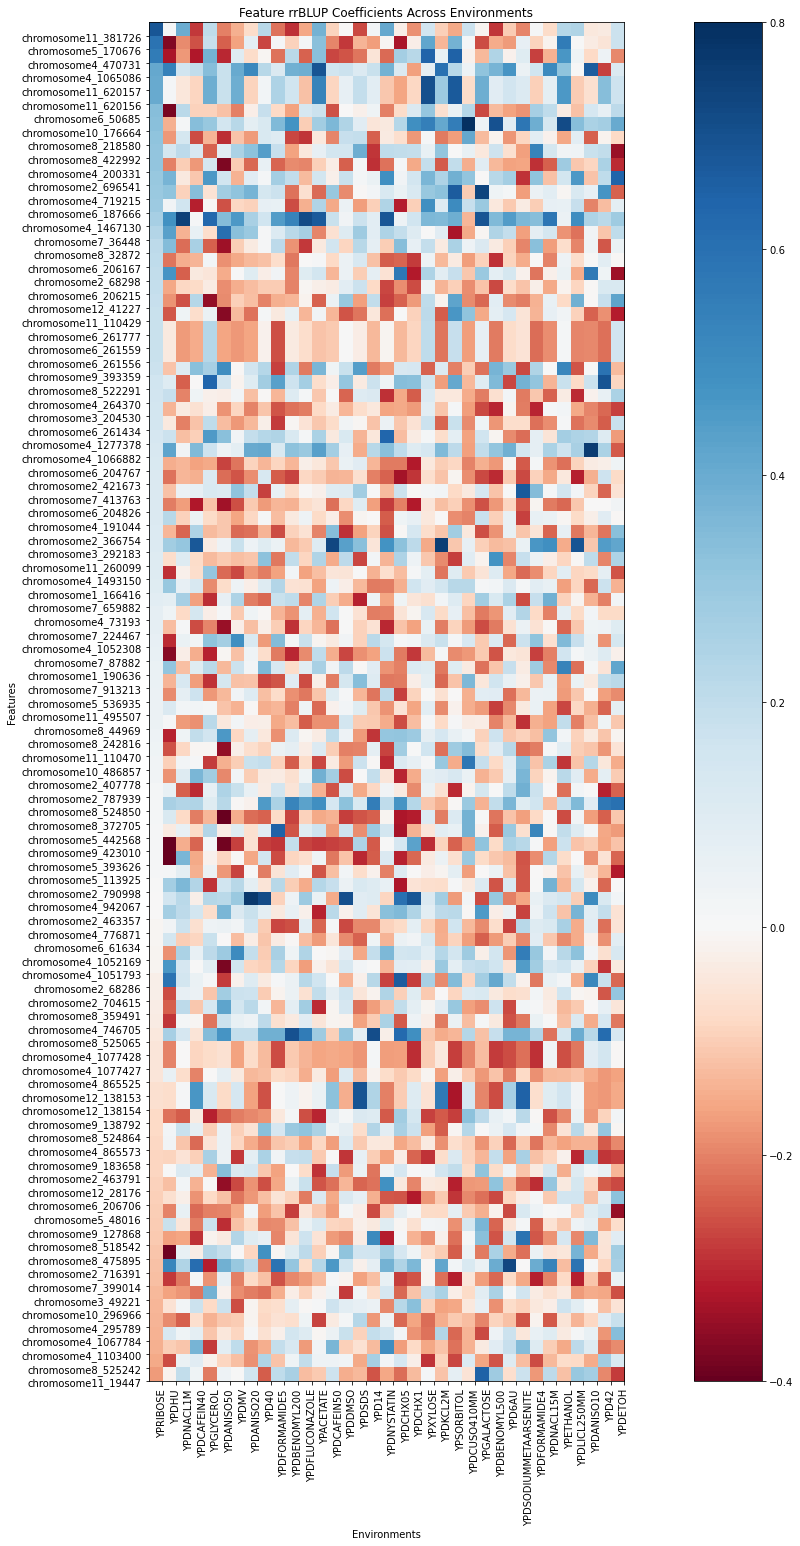

In [ ]:
# Heatmap!
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(25,25))
heatmap = ax.imshow(df_norm, cmap="RdBu", norm=MidpointNormalize(midpoint=0,vmin=-0.4, vmax=0.8))
plt.colorbar(heatmap)
ax.set_yticks(np.arange(df_norm.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(df_norm.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(df_norm.columns, rotation=90)
ax.set_yticklabels(df_norm.index)
ax.set_title("Feature rrBLUP Coefficients Across Environments")
ax.set_xlabel('Environments')
ax.set_ylabel('Features')


/tmp/ipykernel_31649/2035029326.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0, 0.7, 0, 0.7]) # left, bottom, right, top


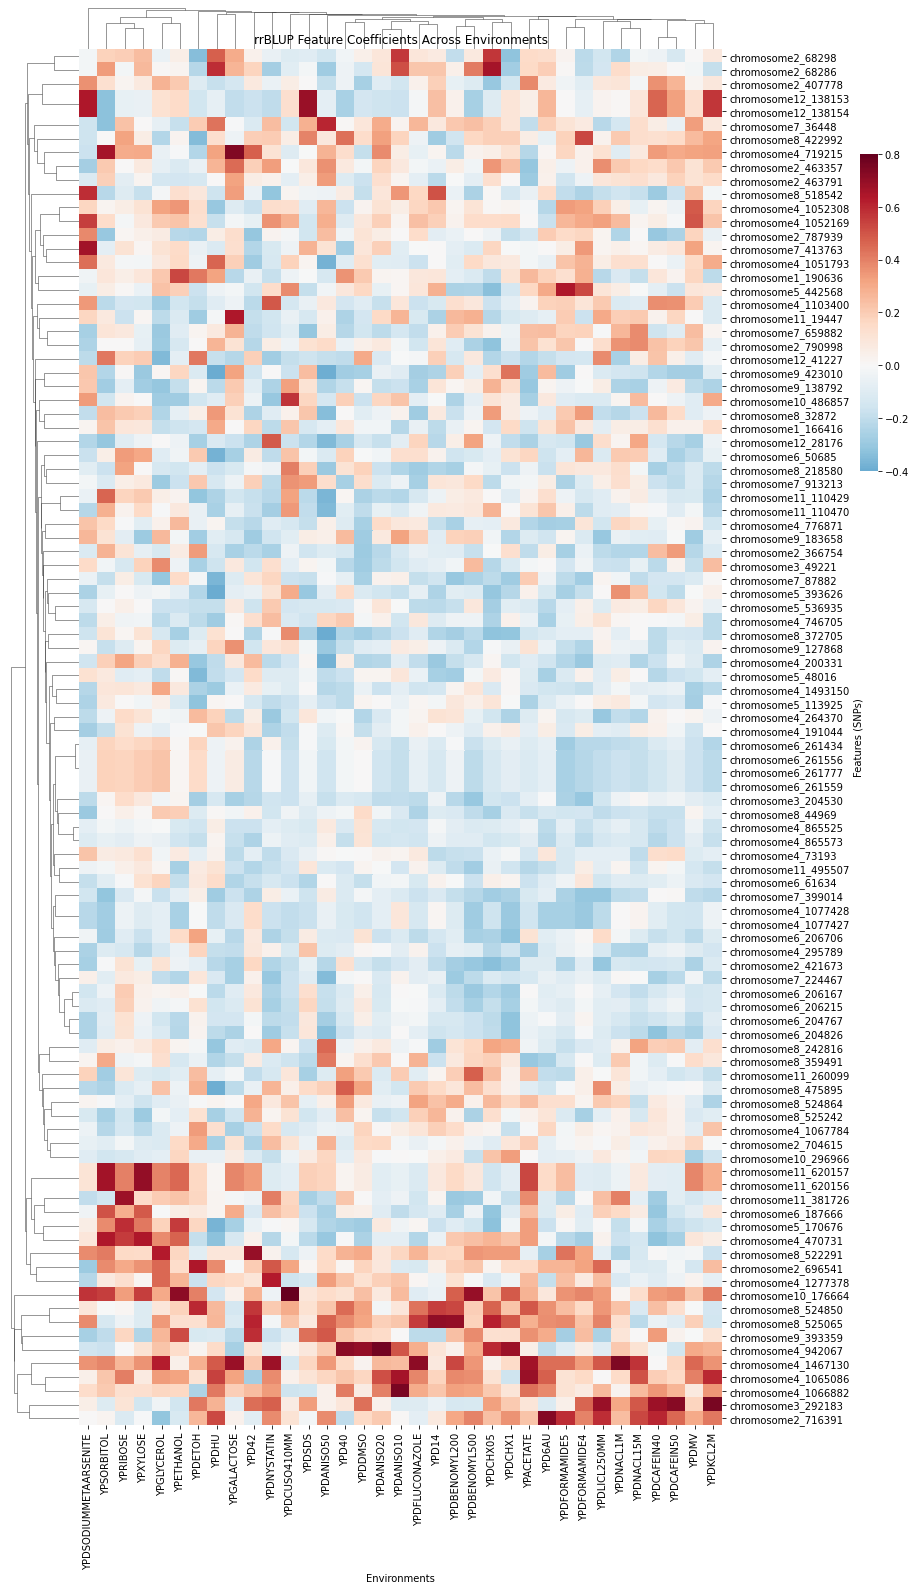

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
fig=sns.clustermap(df_norm, figsize=(12,22), vmin=-0.4,vmax=0.8,center=0,cmap="RdBu_r",cbar_pos=(1, .7, 0.02, .2),dendrogram_ratio=(.1, .03),)
ax = fig.ax_heatmap
ax.set_xlabel("Environments")
ax.set_ylabel("Features (SNPs)")
ax.set_title("rrBLUP Feature Coefficients Across Environments")
plt.tight_layout(rect=[0, 0.7, 0, 0.7]) # left, bottom, right, top
plt.show(ax)
#plt.savefig("rrBLUP_top_feat_across_envs.png")

In [ ]:
df_norm = df_norm.reset_index()
df_norm.head()

,level_0,index,YPRIBOSE,YPDHU,YPDNACL1M,YPDCAFEIN40,YPGLYCEROL,YPDANISO50,YPDMV,YPDANISO20,...,YPDBENOMYL500,YPD6AU,YPDSODIUMMETAARSENITE,YPDFORMAMIDE4,YPDNACL15M,YPETHANOL,YPDLICL250MM,YPDANISO10,YPD42,YPDETOH
0,0,chromosome11_381726,0.682601,0.018537,0.398390,-0.281254,0.201558,-0.200296,-0.141103,-0.071941,...,-0.284735,-0.101329,-0.194315,0.007063,-0.073223,0.230391,0.239120,-0.042878,-0.036670,0.174897
1,1,chromosome5_170676,0.592742,-0.370486,-0.188988,-0.254908,0.185387,-0.239615,-0.162390,0.078176,...,-0.148527,-0.170365,0.063569,-0.087908,-0.013539,0.558851,0.001964,-0.033860,-0.051187,0.171709
2,2,chromosome4_470731,0.558882,-0.327755,-0.174483,-0.319942,0.377237,-0.301734,0.094139,-0.074081,...,0.240346,-0.017896,0.095719,-0.272525,-0.137522,0.467368,0.035577,-0.078241,0.041155,-0.192902
3,3,chromosome4_1065086,0.406337,0.543260,0.156661,0.196049,0.340377,0.175565,0.401844,0.516249,...,0.370380,0.472586,0.049338,0.161353,0.508473,0.321271,0.006145,0.663476,-0.273364,0.118720
4,4,chromosome11_620157,0.401108,0.012919,-0.046108,-0.085411,0.393665,0.179939,0.391967,-0.088187,...,0.089155,0.154598,0.106448,-0.096608,0.079057,0.459428,-0.101282,-0.062606,0.339271,0.163803


In [ ]:
# Genes represented by these top 100 snps across envs and pathways
dir = "/mnt/home/seguraab/Shiu_Lab/Project/Data/Peter_2018/"
dir2 = "/mnt/home/seguraab/Shiu_Lab/Project/Data/S288C_reference_genome_R64-2-1_20150113/"
genes = pd.read_csv("%sbiallelic_snps_diploid_and_S288C_genes.txt"%dir, header=None)
biop = pd.read_csv("%sAll_genes_and_pathways_in_S._cerevisiae_S288c.txt"%dir2, header=0, delimiter="\t")
genes.head(), biop.head()

(                  0            1     2           3
 0  chromosome1_1065  chromosome1  1065     YAL023C
 1  chromosome1_2789  chromosome1  2789     YAL063C
 2  chromosome1_2958  chromosome1  2958  intergenic
 3  chromosome1_3053  chromosome1  3053  intergenic
 4  chromosome1_3207  chromosome1  3207     YAL062W,
       Genes Pathways of gene
 0  15S_RRNA              NaN
 1  21S_RRNA              NaN
 2      AAC1              NaN
 3      AAC3              NaN
 4     AAD10              NaN)

In [ ]:
meta = df_norm.merge(genes, how="inner", left_on=["index"], right_on=[0])
meta2 = meta.merge(biop, how="left", left_on=[3], right_on=["Genes"])
meta2.head(), meta2.shape

(                 index  YPRIBOSE     YPDHU  YPDNACL1M  YPDCAFEIN40  \
 0  chromosome11_381726  0.682601  0.018537   0.398390    -0.281254   
 1   chromosome5_170676  0.592742 -0.370486  -0.188988    -0.254908   
 2   chromosome4_470731  0.558882 -0.327755  -0.174483    -0.319942   
 3  chromosome4_1065086  0.406337  0.543260   0.156661     0.196049   
 4  chromosome11_620157  0.401108  0.012919  -0.046108    -0.085411   
 
    YPGLYCEROL  YPDANISO50     YPDMV  YPDANISO20     YPD40  ...  YPDLICL250MM  \
 0    0.201558   -0.200296 -0.141103   -0.071941  0.219883  ...      0.239120   
 1    0.185387   -0.239615 -0.162390    0.078176 -0.268338  ...      0.001964   
 2    0.377237   -0.301734  0.094139   -0.074081 -0.006309  ...      0.035577   
 3    0.340377    0.175565  0.401844    0.516249  0.222595  ...      0.006145   
 4    0.393665    0.179939  0.391967   -0.088187  0.023781  ...     -0.101282   
 
    YPDANISO10     YPD42   YPDETOH                    0             1        2  \
 0

In [ ]:
meta2["Pathways of gene"].unique() # of the genes with pathway information, only ethylene glycol is not nan (chromosome12_28176)

array([nan, 'ethylene glycol degradation'], dtype=object)

In [ ]:
meta2.Genes.unique() # not all genes had pathway information extracted (these are the nan)

array([nan, 'YBR238C', 'YFL066C', 'YBL111C', 'YDR239C', 'YLL056C'],
      dtype=object)

In [ ]:
meta2[3].unique() # 76 genes

array(['YKL032C', 'YER008C', 'YDL227C', 'YDR301W', 'YKR095W', 'YFL041W',
       'YJL129C', 'YHR057C', 'YHL030W', 'YDL143W', 'YBR238C', 'YDR132C',
       'YFR019W', 'YDR508C', 'YGL076C', 'YHR108W', 'YFR026C', 'YBR231C',
       'YLR134W', 'intergenic', 'YIR019C', 'YHL027W', 'YDL239C',
       'YCR042C', 'YFL066C', 'YDL185W', 'YBR086C', 'YDL147W', 'YBL111C',
       'YKL216W', 'YDL171C', 'YGL229C', 'YDR138W', 'YGL150C', 'YDL197C',
       'YGL259W', 'YAR035W', 'YGR209C', 'YER173W', 'YKR028W', 'YHR172W',
       'YHR073W', 'YKL179C', 'YJR031C', 'YBR293W', 'YHR135C', 'YEL058W',
       'YIR036W-A', 'YER114C', 'YEL022W', 'YBR294W', 'YDR239C', 'YBR112C',
       'YDR160W', 'YFL036W', 'YDR294C', 'YBL082C', 'YHL033C', 'YDL214C',
       'YDR307W', 'YDR207C', 'YLL005C', 'YIL173W', 'YIL171W-A', 'YLL056C',
       'YER155C', 'YIL123W', 'YHR208W', 'YHL029C', 'YBR248C', 'YGL055W',
       'YCL043C', 'YJL076W', 'YDL090C', 'YDR302W', 'YDR317W', 'YKL132C'],
      dtype=object)

In [ ]:
dir = "/mnt/home/seguraab/Shiu_Lab/Project/yeast_rrBLUP_results/SNPs_as_Features"
to_save = meta2[["index", 0,1,2,3,"Genes", "Pathways of gene"]]
to_save.to_csv("%s/rrBLUP_top_feat_across_envs_metadata.csv"%dir)
to_save

,index,0,1,2,3,Genes,Pathways of gene
0,chromosome11_381726,chromosome11_381726,chromosome11,381726,YKL032C,NaN,NaN
1,chromosome5_170676,chromosome5_170676,chromosome5,170676,YER008C,NaN,NaN
2,chromosome4_470731,chromosome4_470731,chromosome4,470731,YDL227C,NaN,NaN
3,chromosome4_1065086,chromosome4_1065086,chromosome4,1065086,YDR301W,NaN,NaN
4,chromosome11_620157,chromosome11_620157,chromosome11,620157,YKR095W,NaN,NaN
...,...,...,...,...,...,...,...
95,chromosome4_295789,chromosome4_295789,chromosome4,295789,YDL090C,NaN,NaN
96,chromosome4_1067784,chromosome4_1067784,chromosome4,1067784,YDR302W,NaN,NaN
97,chromosome4_1103400,chromosome4_1103400,chromosome4,1103400,YDR317W,NaN,NaN
98,chromosome8_525242,chromosome8_525242,chromosome8,525242,YHL027W,NaN,NaN


# RF - union of the matrices

In [ ]:
import pandas as pd
import datatable as dt
dir = "/mnt/gs18/scratch/users/seguraab/yeast_project/yeast_rf_results/"
dict={}
for f in envs:
    imp = dt.fread("%sfeat_rf_%s_top_RFScores.txt"%(dir,f))
    imp =imp.to_pandas()
    imp = imp.set_index('C0')
    imp = imp.set_axis([f], axis=1) # set col name to f
    dict[f] = imp[f]
df = pd.DataFrame(dict)
df


,YPACETATE,YPD14,YPD40,YPD42,YPD6AU,YPDANISO10,YPDANISO20,YPDANISO50,YPDBENOMYL200,YPDBENOMYL500,...,YPDNACL1M,YPDNYSTATIN,YPDSDS,YPDSODIUMMETAARSENITE,YPETHANOL,YPGALACTOSE,YPRIBOSE,YPGLYCEROL,YPXYLOSE,YPSORBITOL
C0,,,,,,,,,,,,,,,,,,,,,
chromosome1_1065,0.000003,2.219180e-07,3.424350e-06,1.126699e-05,1.616373e-06,5.230926e-05,1.890004e-07,8.300052e-07,1.038112e-06,3.680163e-08,...,5.952023e-06,6.605975e-07,6.295173e-05,1.798141e-06,4.097074e-05,1.180713e-04,4.866681e-07,4.824405e-05,0.000012,9.507471e-06
chromosome1_2789,0.000012,1.011397e-04,5.411666e-07,1.714237e-06,1.177675e-05,4.126198e-04,3.972767e-06,3.987063e-08,1.829916e-04,7.002803e-06,...,1.235853e-06,3.817910e-06,5.100068e-07,2.993214e-09,7.612844e-09,3.634671e-06,1.634633e-06,5.107833e-07,0.000005,6.930805e-06
chromosome1_2958,0.000000,9.665307e-06,0.000000e+00,0.000000e+00,0.000000e+00,6.331454e-05,0.000000e+00,3.014489e-04,7.456123e-08,0.000000e+00,...,8.386818e-06,0.000000e+00,0.000000e+00,4.959264e-06,3.645308e-05,0.000000e+00,2.242441e-08,0.000000e+00,0.000106,0.000000e+00
chromosome1_3053,0.000004,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.311484e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.059093e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
chromosome1_3207,0.000000,8.142535e-05,1.478102e-08,1.115633e-05,1.017385e-08,0.000000e+00,2.886991e-09,3.210642e-05,6.456681e-05,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.878618e-07,0.000000e+00,1.027358e-07,0.000000e+00,0.000039,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chromosome12_179978,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.234008e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.768810e-08,...,0.000000e+00,3.660724e-05,8.569660e-07,0.000000e+00,0.000000e+00,4.761245e-08,2.157374e-07,0.000000e+00,0.000000,0.000000e+00
chromosome12_180242,0.000027,2.110576e-05,5.343493e-05,8.990359e-06,2.252016e-05,4.481132e-07,9.459631e-06,1.225860e-05,4.499125e-06,6.315006e-08,...,2.690725e-05,3.077123e-05,5.600594e-06,2.836775e-06,6.953166e-05,3.598244e-05,2.188119e-05,6.060808e-05,0.000004,3.498677e-05
chromosome12_180474,0.000000,1.196265e-06,4.431914e-09,1.348643e-09,6.085258e-07,0.000000e+00,8.942171e-09,3.454001e-06,2.939746e-06,2.835030e-06,...,5.979916e-05,5.829961e-07,6.119129e-07,1.593721e-06,3.646177e-06,2.213924e-08,0.000000e+00,6.027472e-09,0.000016,8.320730e-07


In [ ]:
#df.sort_values(by=list(df.columns), axis=1, ascending=False)
#df = df.reset_index()
#df
df2 = df.sort_values(['C0', 'YPACETATE'], ascending=False).groupby('C0').head(100)
df2 = df2.iloc[0:100,:]
df2

,C0,YPACETATE,YPD14,YPD40,YPD42,YPD6AU,YPDANISO10,YPDANISO20,YPDANISO50,YPDBENOMYL200,...,YPDNACL1M,YPDNYSTATIN,YPDSDS,YPDSODIUMMETAARSENITE,YPETHANOL,YPGALACTOSE,YPRIBOSE,YPGLYCEROL,YPXYLOSE,YPSORBITOL
47333,chromosome9_99972,7.531524e-08,1.703349e-05,1.920512e-05,1.221004e-05,3.106929e-05,3.590300e-07,4.465723e-10,2.927669e-07,0.000010,...,2.051338e-06,1.917737e-06,5.249904e-05,3.087905e-08,0.000000e+00,1.888390e-10,9.588267e-05,4.390713e-07,4.408570e-09,1.972236e-06
47332,chromosome9_99846,0.000000e+00,1.288562e-07,8.990489e-08,0.000000e+00,1.789547e-06,1.215818e-07,0.000000e+00,6.132747e-07,0.000000,...,1.124923e-07,1.814701e-07,0.000000e+00,0.000000e+00,2.362061e-07,1.198765e-06,4.117030e-06,8.830681e-06,6.158523e-07,8.182722e-10
47331,chromosome9_99807,0.000000e+00,3.476099e-07,8.380008e-09,0.000000e+00,8.615781e-06,6.800764e-06,2.893219e-08,3.161681e-06,0.000002,...,1.303605e-05,5.110424e-07,0.000000e+00,0.000000e+00,2.307057e-06,0.000000e+00,2.973781e-07,3.784639e-07,9.832389e-06,6.019112e-06
47330,chromosome9_99794,7.209348e-06,0.000000e+00,3.967432e-08,1.592802e-07,2.636884e-06,5.375644e-07,7.269451e-07,1.005961e-05,0.000000,...,4.296133e-08,7.000171e-08,7.120099e-07,1.727019e-06,3.998923e-06,3.466341e-09,1.109774e-05,0.000000e+00,4.229599e-05,5.508132e-06
47329,chromosome9_99772,2.260405e-05,0.000000e+00,8.165947e-05,1.513881e-08,1.167621e-07,0.000000e+00,0.000000e+00,3.740025e-09,0.000000,...,1.451862e-05,5.467770e-06,1.372241e-07,1.386002e-05,1.617641e-06,1.818330e-06,7.055331e-09,0.000000e+00,2.396270e-06,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47238,chromosome9_92024,5.029667e-07,4.561413e-07,4.970309e-08,2.022302e-06,0.000000e+00,2.069335e-08,6.566789e-07,0.000000e+00,0.000060,...,5.081200e-05,0.000000e+00,3.730599e-05,6.565419e-08,6.454685e-06,1.347804e-05,8.700578e-07,5.150077e-08,1.359731e-07,0.000000e+00
47237,chromosome9_91970,0.000000e+00,0.000000e+00,1.693350e-04,5.328306e-05,0.000000e+00,5.631644e-07,7.246482e-08,0.000000e+00,0.000004,...,1.788285e-07,3.391237e-07,4.386970e-05,4.086916e-06,1.247206e-09,0.000000e+00,0.000000e+00,0.000000e+00,1.200286e-07,0.000000e+00
47236,chromosome9_91967,8.100764e-07,1.671434e-08,3.578077e-07,4.420930e-05,3.784644e-08,6.792198e-06,1.090460e-06,1.411616e-10,0.000015,...,4.018987e-05,0.000000e+00,7.519468e-05,1.297599e-06,0.000000e+00,0.000000e+00,8.458646e-06,3.712639e-08,7.468991e-06,3.077440e-09
47235,chromosome9_91718,1.352012e-06,1.813364e-05,1.085715e-07,3.707357e-09,1.075619e-07,4.362754e-06,0.000000e+00,1.184347e-07,0.000000,...,0.000000e+00,2.213576e-08,0.000000e+00,2.785168e-08,4.961113e-06,3.113417e-08,1.545379e-10,0.000000e+00,7.566444e-07,0.000000e+00


In [ ]:
# Min-max normalization of data columns
df2 = df2.set_index('C0')
df2_norm = (df2 - df2.mean()) / (df2.max() - df2.min())
df2_norm.shape

(100, 35)

/tmp/ipykernel_31649/2915455980.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0, 0.7, 0, 0.7]) # left, bottom, right, top


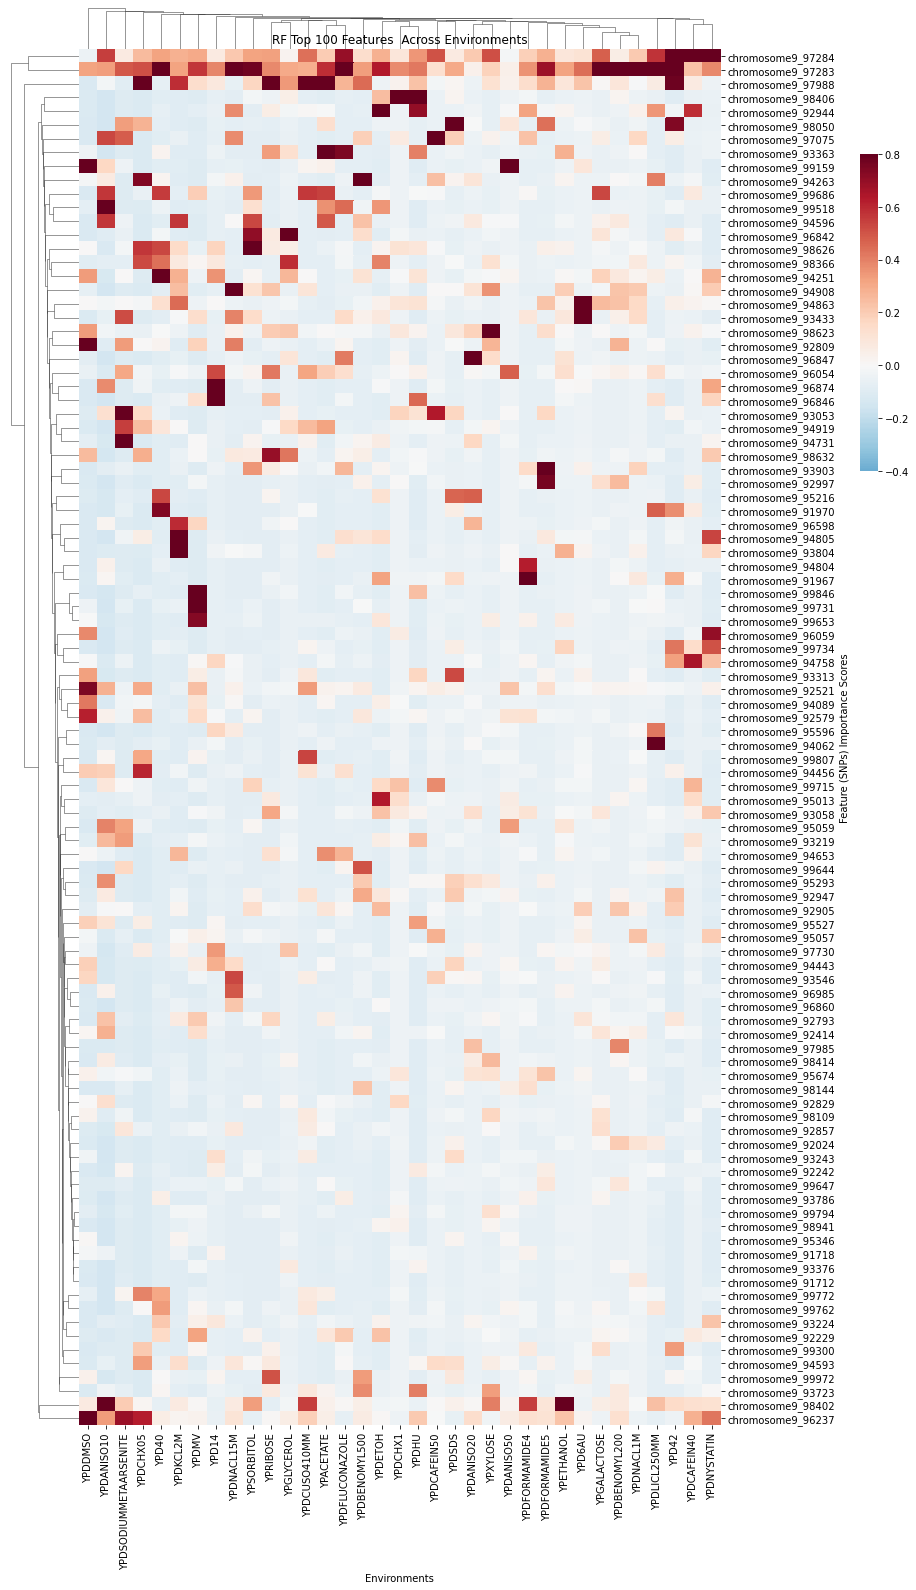

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
fig=sns.clustermap(df2_norm, figsize=(12,22), vmin=-0.4,vmax=0.8,center=0,cmap="RdBu_r",cbar_pos=(1, .7, 0.02, .2),dendrogram_ratio=(.1, .03),)
ax = fig.ax_heatmap
ax.set_xlabel("Environments")
ax.set_ylabel("Feature (SNPs) Importance Scores")
ax.set_title("RF Top 100 Features  Across Environments")
plt.tight_layout(rect=[0, 0.7, 0, 0.7]) # left, bottom, right, top
plt.show(ax)
#plt.savefig("RF_top_feat_across_envs.png")

In [ ]:
m = df2_norm.merge(genes, how="inner", left_on=["C0"], right_on=[0])
m2 = m.merge(biop, how="left", left_on=[3], right_on=["Genes"])
m2.head(), m2.shape

(                  C0  YPACETATE     YPD14     YPD40     YPD42    YPD6AU  \
 0  chromosome9_99972  -0.090146  0.024071  0.005755  0.013190  0.060050   
 1  chromosome9_99846  -0.090615 -0.067293 -0.087938 -0.093619 -0.041828   
 2  chromosome9_99807  -0.090615 -0.066111 -0.088338 -0.093619 -0.018076   
 3  chromosome9_99794  -0.045722 -0.067990 -0.088185 -0.092225 -0.038879   
 4  chromosome9_99772   0.050142 -0.067990  0.311874 -0.093486 -0.047648   
 
    YPDANISO10  YPDANISO20  YPDANISO50  YPDBENOMYL200  ...  YPRIBOSE  \
 0   -0.135663   -0.050617   -0.037562      -0.017522  ...  0.507707   
 1   -0.141221   -0.050618   -0.035924      -0.060265  ... -0.058867   
 2    0.015102   -0.050533   -0.022901      -0.051018  ... -0.082450   
 3   -0.131485   -0.048473    0.012348      -0.060265  ... -0.015767   
 4   -0.144066   -0.050618   -0.039039      -0.060265  ... -0.084243   
 
    YPGLYCEROL  YPXYLOSE  YPSORBITOL                  0            1      2  \
 0   -0.057049 -0.070175   -0

In [ ]:
m2["Pathways of gene"].unique()

array([nan], dtype=object)

In [ ]:
m2.Genes.unique()

array([nan, 'YIL134C-A'], dtype=object)

In [ ]:
m2[3].unique()

array(['intergenic', 'YIL133C', 'YIL134W', 'YIL134C-A', 'YIL135C',
       'YIL136W', 'YIL137C'], dtype=object)

In [ ]:
dir = "/mnt/home/seguraab/Shiu_Lab/Project/yeast_RF_results/SNPs_as_Features"
to_save = m2[["C0", 0,1,2,3,"Genes", "Pathways of gene"]]
to_save.to_csv("%s/RF_top_feat_across_envs_metadata.csv"%dir)
to_save

,C0,0,1,2,3,Genes,Pathways of gene
0,chromosome9_99972,chromosome9_99972,chromosome9,99972,intergenic,NaN,NaN
1,chromosome9_99846,chromosome9_99846,chromosome9,99846,intergenic,NaN,NaN
2,chromosome9_99807,chromosome9_99807,chromosome9,99807,intergenic,NaN,NaN
3,chromosome9_99794,chromosome9_99794,chromosome9,99794,intergenic,NaN,NaN
4,chromosome9_99772,chromosome9_99772,chromosome9,99772,intergenic,NaN,NaN
...,...,...,...,...,...,...,...
95,chromosome9_92024,chromosome9_92024,chromosome9,92024,YIL137C,NaN,NaN
96,chromosome9_91970,chromosome9_91970,chromosome9,91970,YIL137C,NaN,NaN
97,chromosome9_91967,chromosome9_91967,chromosome9,91967,YIL137C,NaN,NaN
98,chromosome9_91718,chromosome9_91718,chromosome9,91718,YIL137C,NaN,NaN


In [ ]:
df3 = m2[m2[3] != "intergenic"]
df3

,C0,YPACETATE,YPD14,YPD40,YPD42,YPD6AU,YPDANISO10,YPDANISO20,YPDANISO50,YPDBENOMYL200,...,YPRIBOSE,YPGLYCEROL,YPXYLOSE,YPSORBITOL,0,1,2,3,Genes,Pathways of gene
14,chromosome9_99300,-0.090615,-0.067487,-0.088379,0.338890,-0.017438,-0.104368,-0.050618,-0.039058,-0.060027,...,0.045220,-0.058315,-0.042042,-0.083243,chromosome9_99300,chromosome9,99300,YIL133C,NaN,NaN
15,chromosome9_99159,0.035984,-0.067986,-0.087880,-0.093619,0.100798,0.164762,-0.050618,0.960942,-0.060265,...,-0.084028,-0.058661,-0.030546,-0.075851,chromosome9_99159,chromosome9,99159,YIL133C,NaN,NaN
16,chromosome9_98941,-0.083114,-0.067990,-0.088379,-0.093536,-0.042883,-0.144066,-0.050618,-0.039058,-0.060212,...,-0.084286,-0.058661,0.020189,-0.082878,chromosome9_98941,chromosome9,98941,YIL133C,NaN,NaN
17,chromosome9_98632,-0.077607,-0.064522,-0.086843,-0.091872,-0.030885,-0.139235,-0.030933,-0.037319,-0.011248,...,0.696355,0.426459,-0.069156,0.070098,chromosome9_98632,chromosome9,98632,YIL133C,NaN,NaN
18,chromosome9_98626,-0.048932,0.180559,0.537141,-0.086856,-0.048054,-0.119159,-0.039602,-0.037805,-0.042786,...,0.067004,0.051530,-0.054139,0.916757,chromosome9_98626,chromosome9,98626,YIL133C,NaN,NaN
19,chromosome9_98623,-0.001326,-0.061633,-0.002866,-0.038396,-0.048054,-0.028064,0.181750,-0.039033,-0.038693,...,0.203923,0.219272,0.929804,-0.039697,chromosome9_98623,chromosome9,98623,YIL133C,NaN,NaN
24,chromosome9_98144,-0.088024,-0.067990,-0.088379,-0.093619,-0.033530,-0.119471,-0.049290,0.060201,-0.054914,...,-0.076418,-0.058529,-0.046144,-0.083243,chromosome9_98144,chromosome9,98144,YIL134W,NaN,NaN
25,chromosome9_98109,-0.027247,-0.066154,-0.087531,-0.093619,-0.048054,-0.091099,-0.050618,-0.031641,-0.060265,...,-0.084286,-0.058083,0.175501,-0.083243,chromosome9_98109,chromosome9,98109,YIL134W,NaN,NaN
26,chromosome9_98050,0.130781,-0.065926,-0.078682,0.736027,-0.008156,-0.144052,-0.002474,0.093086,-0.055956,...,-0.078917,-0.052531,-0.070196,-0.069866,chromosome9_98050,chromosome9,98050,YIL134W,NaN,NaN
27,chromosome9_97988,0.909385,0.082823,-0.069026,0.785449,0.227192,-0.022350,-0.046983,0.040149,0.097896,...,0.915714,0.347536,0.120527,0.168908,chromosome9_97988,chromosome9,97988,YIL134W,NaN,NaN


In [ ]:
df4 = df3.iloc[:,0:36]
df4 = df4.set_index('C0')
df4.head()

,YPACETATE,YPD14,YPD40,YPD42,YPD6AU,YPDANISO10,YPDANISO20,YPDANISO50,YPDBENOMYL200,YPDBENOMYL500,...,YPDNACL1M,YPDNYSTATIN,YPDSDS,YPDSODIUMMETAARSENITE,YPETHANOL,YPGALACTOSE,YPRIBOSE,YPGLYCEROL,YPXYLOSE,YPSORBITOL
C0,,,,,,,,,,,,,,,,,,,,,
chromosome9_99300,-0.090615,-0.067487,-0.088379,0.338890,-0.017438,-0.104368,-0.050618,-0.039058,-0.060027,-0.075182,...,-0.044120,-0.092462,-0.067205,-0.102139,-0.052377,0.141760,0.045220,-0.058315,-0.042042,-0.083243
chromosome9_99159,0.035984,-0.067986,-0.087880,-0.093619,0.100798,0.164762,-0.050618,0.960942,-0.060265,-0.074438,...,-0.046495,-0.092462,-0.065034,-0.042712,-0.040712,-0.059300,-0.084028,-0.058661,-0.030546,-0.075851
chromosome9_98941,-0.083114,-0.067990,-0.088379,-0.093536,-0.042883,-0.144066,-0.050618,-0.039058,-0.060212,-0.070662,...,-0.046902,-0.084896,-0.066265,-0.102140,-0.038793,-0.054613,-0.084286,-0.058661,0.020189,-0.082878
chromosome9_98632,-0.077607,-0.064522,-0.086843,-0.091872,-0.030885,-0.139235,-0.030933,-0.037319,-0.011248,0.053405,...,-0.039728,0.208950,-0.064893,-0.102136,-0.046252,-0.052963,0.696355,0.426459,-0.069156,0.070098
chromosome9_98626,-0.048932,0.180559,0.537141,-0.086856,-0.048054,-0.119159,-0.039602,-0.037805,-0.042786,-0.073509,...,-0.002588,-0.092462,-0.065680,-0.021100,0.034457,-0.014053,0.067004,0.051530,-0.054139,0.916757


In [ ]:
g = df3[['C0',3]]
g=g.set_index('C0')
g.head()

,3
C0,
chromosome9_99300,YIL133C
chromosome9_99159,YIL133C
chromosome9_98941,YIL133C
chromosome9_98632,YIL133C
chromosome9_98626,YIL133C


In [ ]:
df4 = df4.reset_index(level=[0])
snps = df4.pop('C0')

,1,2,3
0,,,
chromosome1_1065,chromosome1,1065,YAL023C
chromosome1_2789,chromosome1,2789,YAL063C
chromosome1_2958,chromosome1,2958,intergenic
chromosome1_3053,chromosome1,3053,intergenic
chromosome1_3207,chromosome1,3207,YAL062W
...,...,...,...
chromosome12_179978,chromosome12,179978,YLL061W
chromosome12_180242,chromosome12,180242,YLL061W
chromosome12_180474,chromosome12,180474,YLR019W


In [ ]:
colors = g.to_dict()
df4.set_index(snps, inplace=True,)
df4

,YPACETATE,YPD14,YPD40,YPD42,YPD6AU,YPDANISO10,YPDANISO20,YPDANISO50,YPDBENOMYL200,YPDBENOMYL500,...,YPDNACL1M,YPDNYSTATIN,YPDSDS,YPDSODIUMMETAARSENITE,YPETHANOL,YPGALACTOSE,YPRIBOSE,YPGLYCEROL,YPXYLOSE,YPSORBITOL
C0,,,,,,,,,,,,,,,,,,,,,
chromosome9_99300,-0.090615,-0.067487,-0.088379,0.338890,-0.017438,-0.104368,-0.050618,-0.039058,-0.060027,-0.075182,...,-0.044120,-0.092462,-0.067205,-0.102139,-0.052377,0.141760,0.045220,-0.058315,-0.042042,-0.083243
chromosome9_99159,0.035984,-0.067986,-0.087880,-0.093619,0.100798,0.164762,-0.050618,0.960942,-0.060265,-0.074438,...,-0.046495,-0.092462,-0.065034,-0.042712,-0.040712,-0.059300,-0.084028,-0.058661,-0.030546,-0.075851
chromosome9_98941,-0.083114,-0.067990,-0.088379,-0.093536,-0.042883,-0.144066,-0.050618,-0.039058,-0.060212,-0.070662,...,-0.046902,-0.084896,-0.066265,-0.102140,-0.038793,-0.054613,-0.084286,-0.058661,0.020189,-0.082878
chromosome9_98632,-0.077607,-0.064522,-0.086843,-0.091872,-0.030885,-0.139235,-0.030933,-0.037319,-0.011248,0.053405,...,-0.039728,0.208950,-0.064893,-0.102136,-0.046252,-0.052963,0.696355,0.426459,-0.069156,0.070098
chromosome9_98626,-0.048932,0.180559,0.537141,-0.086856,-0.048054,-0.119159,-0.039602,-0.037805,-0.042786,-0.073509,...,-0.002588,-0.092462,-0.065680,-0.021100,0.034457,-0.014053,0.067004,0.051530,-0.054139,0.916757
chromosome9_98623,-0.001326,-0.061633,-0.002866,-0.038396,-0.048054,-0.028064,0.181750,-0.039033,-0.038693,-0.015360,...,-0.016284,-0.007329,0.089093,-0.049664,0.005070,0.001286,0.203923,0.219272,0.929804,-0.039697
chromosome9_98144,-0.088024,-0.067990,-0.088379,-0.093619,-0.033530,-0.119471,-0.049290,0.060201,-0.054914,0.229633,...,-0.047143,-0.056789,0.024958,-0.067843,-0.044265,-0.059300,-0.076418,-0.058529,-0.046144,-0.083243
chromosome9_98109,-0.027247,-0.066154,-0.087531,-0.093619,-0.048054,-0.091099,-0.050618,-0.031641,-0.060265,-0.075182,...,-0.046002,-0.090788,-0.015925,-0.033100,-0.052945,0.124974,-0.084286,-0.058083,0.175501,-0.083243
chromosome9_98050,0.130781,-0.065926,-0.078682,0.736027,-0.008156,-0.144052,-0.002474,0.093086,-0.055956,-0.075179,...,-0.031388,-0.051754,0.932795,0.335130,-0.044027,-0.031931,-0.078917,-0.052531,-0.070196,-0.069866


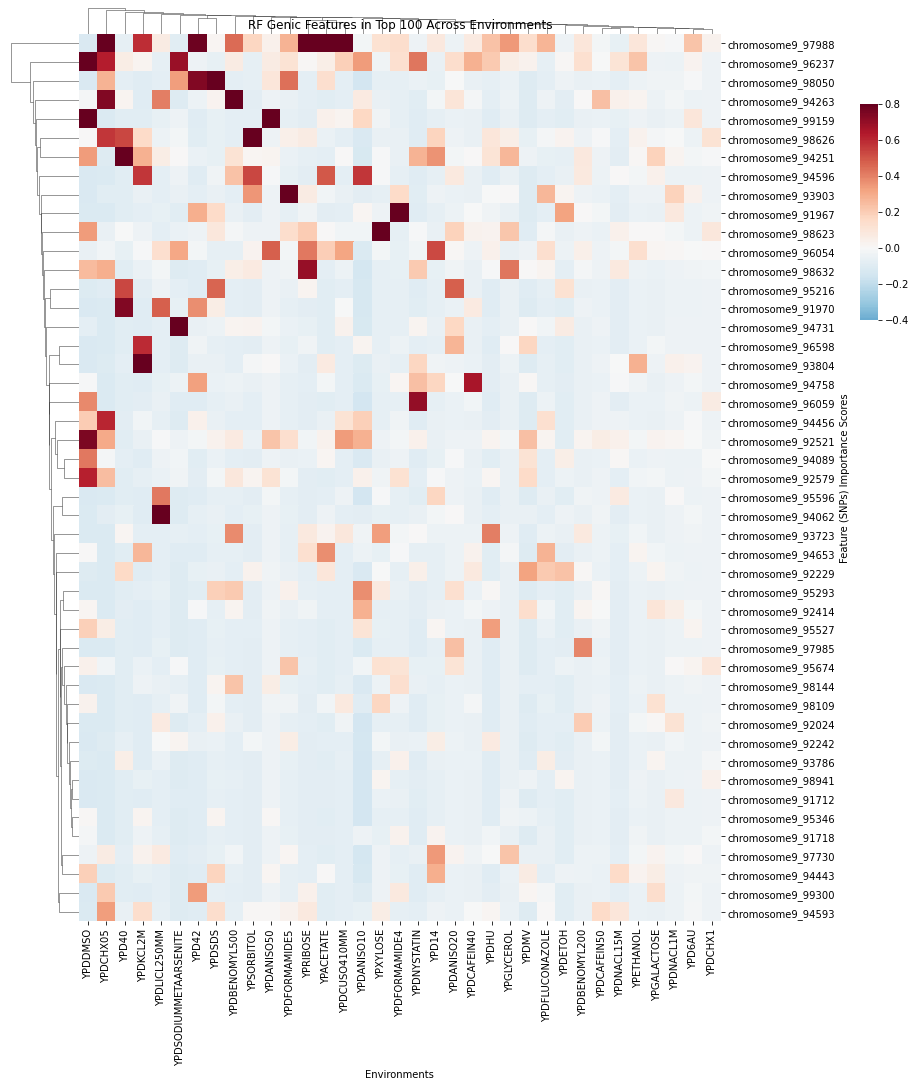

In [ ]:
fig=sns.clustermap(df4, figsize=(12,15), vmin=-0.4,vmax=0.8,center=0,cmap="RdBu_r",cbar_pos=(1, .7, 0.02, .2),dendrogram_ratio=(.1, .03))#,row_colors=g[3].map(colors[3]))
ax = fig.ax_heatmap
ax.set_xlabel("Environments")
ax.set_ylabel("Feature (SNPs) Importance Scores")
ax.set_title("RF Genic Features in Top 100 Across Environments")
#plt.tight_layout(rect=[0, 0.7, 0, 0.7]) # left, bottom, right, top
plt.show(ax)

# No union or intersection, just concatenating the top 100 SNPs for each environment into one dataframe

### rrBLUP

In [ ]:
# rrBLUP feature coefficients (64k baseline model)
import os
import datatable as dt
import pandas as pd

envs = ["YPACETATE", "YPD14", "YPD40", "YPD42", "YPD6AU", "YPDANISO10", 
"YPDANISO20", "YPDANISO50", "YPDBENOMYL200", "YPDBENOMYL500", "YPDCAFEIN40", 
"YPDCAFEIN50", "YPDCHX05", "YPDCHX1", "YPDCUSO410MM", "YPDDMSO", "YPDETOH", 
"YPDFLUCONAZOLE", "YPDFORMAMIDE4", "YPDFORMAMIDE5", "YPDHU", "YPDKCL2M", 
"YPDLICL250MM", "YPDMV", "YPDNACL15M", "YPDNACL1M", "YPDNYSTATIN", "YPDSDS", 
"YPDSODIUMMETAARSENITE", "YPETHANOL", "YPGALACTOSE", "YPRIBOSE", "YPGLYCEROL", 
"YPXYLOSE", "YPSORBITOL"]


rrblup = pd.DataFrame()
rrblup_rank = pd.DataFrame()
rank_inv = pd.DataFrame()
dir = "/mnt/home/seguraab/Shiu_Lab/Project/yeast_rrBLUP_results/SNPs_as_Features"
print("Progress:", end = " ")
for f in os.listdir(dir):
    if f in envs: # Access directory for each environment
        coef = dt.fread("%s/%s/Coef_exome_geno_%s_%s.csv"%(dir,f,f,f)).to_pandas() # file of feature coefficients
        coef = coef.mean() # take the mean of each column
        coef = coef.transpose() # transpose
        coef = coef.to_frame(name=f) # set col name to f
        coef = coef.sort_values(by=f, ascending=False) # sort values in descending order
        #coef = coef.iloc[0:100,:] # take the top 100 features for the heatmap
        coef["%s_rank"%f] = range(1,1+len(coef)) # add feature rank column
        rrblup = pd.concat([rrblup, coef[f]], axis=1) # union
        rrblup_rank = pd.concat([rrblup_rank, coef["%s_rank"%f]], axis=1) # all 64k feature ranks
        rank_inv = 1 - ((rrblup_rank - 1)/(len(coef) - 1)) # all 64k feature ranks inverted
        print("•", end = " ")
print("100%")

rrblup = rrblup.fillna(0) # replace NaNs with 0
rrblup_rank = rrblup_rank.fillna(0)

Progress: • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • 100%


In [ ]:
rrblup.shape

(64456, 35)

In [ ]:
rrblup.head()

,YPRIBOSE,YPDHU,YPDNACL1M,YPDCAFEIN40,YPGLYCEROL,YPDANISO50,YPDMV,YPDANISO20,YPD40,YPDFORMAMIDE5,...,YPDBENOMYL500,YPD6AU,YPDSODIUMMETAARSENITE,YPDFORMAMIDE4,YPDNACL15M,YPETHANOL,YPDLICL250MM,YPDANISO10,YPD42,YPDETOH
chromosome10_387633,0.000191,0.000010,0.000091,0.000078,0.000113,0.000038,-5.417197e-07,-0.000024,0.000087,-0.000022,...,0.000105,3.398641e-05,0.000080,0.000012,0.000019,0.000187,0.000086,0.000006,-0.000040,0.000087
chromosome2_111999,0.000186,0.000113,0.000044,0.000061,0.000118,-0.000054,6.343979e-05,-0.000370,0.000130,0.000056,...,0.000006,-1.302311e-07,0.000375,-0.000003,0.000044,0.000328,0.000161,-0.000280,0.000090,0.000047
chromosome4_636737,0.000185,0.000009,0.000114,0.000100,0.000086,0.000007,5.825046e-05,-0.000050,0.000101,0.000067,...,0.000082,-3.550121e-05,-0.000105,0.000155,0.000059,0.000071,0.000174,0.000008,0.000091,0.000046
chromosome9_190020,0.000182,0.000048,0.000017,0.000028,0.000066,-0.000055,1.986209e-05,-0.000204,-0.000096,0.000010,...,0.000008,3.230929e-05,0.000225,-0.000001,-0.000034,0.000215,0.000039,-0.000084,-0.000077,-0.000017
chromosome12_36724,0.000178,0.000030,-0.000024,0.000034,0.000084,0.000021,9.304283e-05,0.000144,-0.000103,-0.000019,...,0.000106,-2.230175e-05,0.000069,-0.000080,0.000010,0.000260,-0.000034,0.000179,0.000007,0.000071


In [ ]:
rrblup_rank.head()

,YPRIBOSE_rank,YPDHU_rank,YPDNACL1M_rank,YPDCAFEIN40_rank,YPGLYCEROL_rank,YPDANISO50_rank,YPDMV_rank,YPDANISO20_rank,YPD40_rank,YPDFORMAMIDE5_rank,...,YPDBENOMYL500_rank,YPD6AU_rank,YPDSODIUMMETAARSENITE_rank,YPDFORMAMIDE4_rank,YPDNACL15M_rank,YPETHANOL_rank,YPDLICL250MM_rank,YPDANISO10_rank,YPD42_rank,YPDETOH_rank
chromosome10_387633,1,23241,418,2716,32,2561,35815,41282,4023,51598,...,825,5132,14737,24021,11818,93,1540,31639,55421,92
chromosome2_111999,2,116,4291,5190,22,63500,1289,64391,1140,2370,...,26871,30704,569,35490,1930,1,86,63987,1252,2253
chromosome4_636737,3,24341,141,1159,233,24060,1718,48572,2609,1486,...,1647,58470,53628,94,742,5314,56,30791,1158,2385
chromosome9_190020,4,3313,17954,16118,820,63537,15127,63425,61696,23189,...,25201,5689,2580,34620,61457,29,9966,54878,62430,49889
chromosome12_36724,5,9063,54769,13575,256,9922,296,2730,62180,49702,...,801,51896,16761,62901,21161,6,55640,2182,28895,320


In [ ]:
rank_inv.head()

,YPRIBOSE_rank,YPDHU_rank,YPDNACL1M_rank,YPDCAFEIN40_rank,YPGLYCEROL_rank,YPDANISO50_rank,YPDMV_rank,YPDANISO20_rank,YPD40_rank,YPDFORMAMIDE5_rank,...,YPDBENOMYL500_rank,YPD6AU_rank,YPDSODIUMMETAARSENITE_rank,YPDFORMAMIDE4_rank,YPDNACL15M_rank,YPETHANOL_rank,YPDLICL250MM_rank,YPDANISO10_rank,YPD42_rank,YPDETOH_rank
chromosome10_387633,1.000000,0.639438,0.993530,0.957878,0.999519,0.960282,0.444357,0.359538,0.937600,0.199488,...,0.987216,0.920394,0.771375,0.627337,0.816663,0.998573,0.976123,0.509146,0.140175,0.998588
chromosome2_111999,0.999984,0.998216,0.933442,0.919494,0.999674,0.014832,0.980017,0.001008,0.982329,0.963246,...,0.583120,0.523652,0.991188,0.449399,0.970072,1.000000,0.998681,0.007276,0.980591,0.965061
chromosome4_636737,0.999969,0.622372,0.997828,0.982034,0.996401,0.626732,0.973361,0.246435,0.959538,0.976961,...,0.974463,0.092871,0.167993,0.998557,0.988504,0.917570,0.999147,0.522302,0.982049,0.963013
chromosome9_190020,0.999953,0.948615,0.721465,0.749950,0.987293,0.014258,0.765325,0.015996,0.042821,0.640245,...,0.609030,0.911752,0.959988,0.462897,0.046529,0.999566,0.845396,0.148600,0.031433,0.226003
chromosome12_36724,0.999938,0.859406,0.150291,0.789403,0.996044,0.846079,0.995423,0.957660,0.035311,0.228904,...,0.987588,0.194865,0.739974,0.024125,0.671709,0.999922,0.136778,0.966162,0.551718,0.995051


##### Heatmap of top 100 features in each condition

/tmp/ipykernel_71501/844492814.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0, 0.7, 0, 0.7]) # left, bottom, right, top


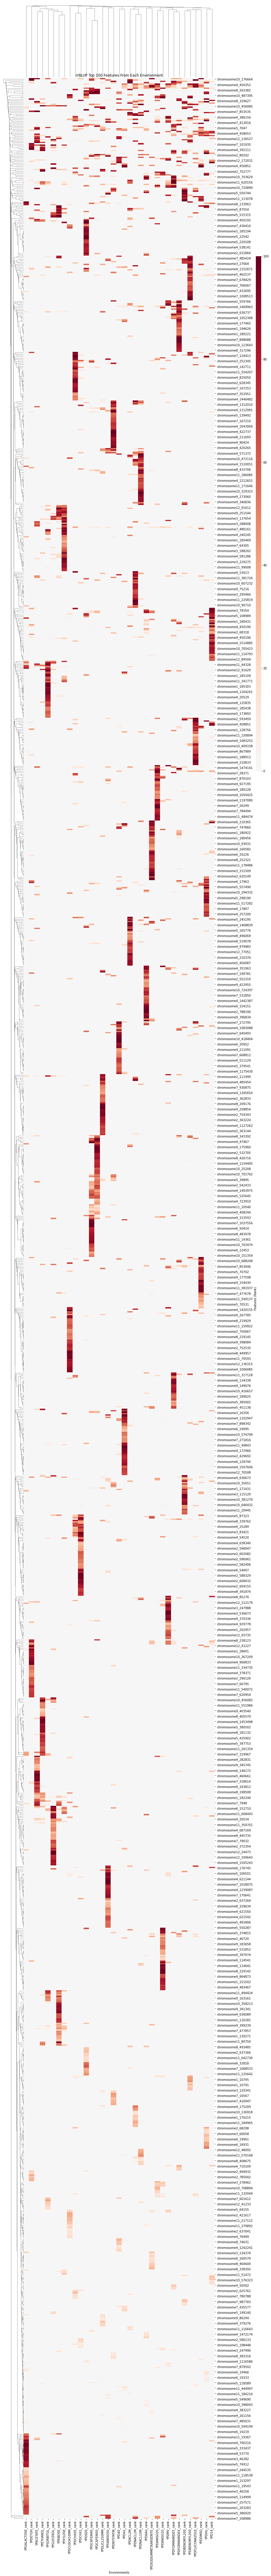

In [ ]:
# Heatmap of the top 100 features
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

fig=sns.clustermap(rrblup_rank, figsize=(12,120),center=0,cmap="RdBu_r",cbar_pos=(1, .7, 0.02, .2),dendrogram_ratio=(.1, .03),)
ax = fig.ax_heatmap
ax.set_xlabel("Environments")
ax.set_ylabel("Features (Rank)")
ax.set_title("rrBLUP Top 100 Features From Each Environment")
plt.tight_layout(rect=[0, 0.7, 0, 0.7]) # left, bottom, right, top
plt.show(ax)

##### Correlation heatmap of feature ranks (64k) for pairwise condition comparisons

In [ ]:
rank_corr = rank_inv.corr(method="pearson")
rank_corr

,YPRIBOSE_rank,YPDHU_rank,YPDNACL1M_rank,YPDCAFEIN40_rank,YPGLYCEROL_rank,YPDANISO50_rank,YPDMV_rank,YPDANISO20_rank,YPD40_rank,YPDFORMAMIDE5_rank,...,YPDBENOMYL500_rank,YPD6AU_rank,YPDSODIUMMETAARSENITE_rank,YPDFORMAMIDE4_rank,YPDNACL15M_rank,YPETHANOL_rank,YPDLICL250MM_rank,YPDANISO10_rank,YPD42_rank,YPDETOH_rank
YPRIBOSE_rank,1.000000,0.000231,0.173147,0.100979,0.758730,-0.055161,0.080241,-0.072565,0.112519,-0.069054,...,0.130309,-0.064808,0.057145,-0.035799,0.172471,0.626961,0.048576,0.048158,0.152442,0.300163
YPDHU_rank,0.000231,1.000000,0.329299,0.391418,-0.011195,0.324387,0.334887,0.376886,0.442567,0.478003,...,0.390338,0.419101,0.217248,0.519516,0.327340,0.003314,0.393349,0.367018,0.354647,0.418297
YPDNACL1M_rank,0.173147,0.329299,1.000000,0.254476,0.102710,0.161053,0.309035,0.112556,0.178961,0.240829,...,0.158881,0.213793,0.160334,0.232559,0.807611,0.103035,0.599397,0.188930,0.224612,0.256218
YPDCAFEIN40_rank,0.100979,0.391418,0.254476,1.000000,0.069576,0.332211,0.333329,0.351496,0.305112,0.272084,...,0.396996,0.243584,0.204607,0.297737,0.310291,0.067418,0.300695,0.382288,0.339697,0.429502
YPGLYCEROL_rank,0.758730,-0.011195,0.102710,0.069576,1.000000,0.043656,0.117282,-0.046736,0.075182,-0.062094,...,0.088047,-0.091914,0.043433,-0.035836,0.120496,0.755994,0.099828,0.040317,0.138253,0.286702
YPDANISO50_rank,-0.055161,0.324387,0.161053,0.332211,0.043656,1.000000,0.411187,0.700734,0.215061,0.272994,...,0.326482,0.266059,0.231470,0.271328,0.254111,0.092903,0.258076,0.481615,0.248862,0.247465
YPDMV_rank,0.080241,0.334887,0.309035,0.333329,0.117282,0.411187,1.000000,0.401319,0.203811,0.472557,...,0.217591,0.231126,0.309075,0.370680,0.323280,0.148189,0.392809,0.390803,0.224493,0.275708
YPDANISO20_rank,-0.072565,0.376886,0.112556,0.351496,-0.046736,0.700734,0.401319,1.000000,0.314106,0.279860,...,0.323261,0.198687,0.223168,0.323851,0.185926,-0.006891,0.203954,0.767299,0.318196,0.200607
YPD40_rank,0.112519,0.442567,0.178961,0.305112,0.075182,0.215061,0.203811,0.314106,1.000000,0.313604,...,0.278118,0.313042,0.204587,0.448503,0.184923,0.043518,0.193858,0.368238,0.732480,0.208231
YPDFORMAMIDE5_rank,-0.069054,0.478003,0.240829,0.272084,-0.062094,0.272994,0.472557,0.279860,0.313604,1.000000,...,0.369943,0.373168,0.181905,0.727605,0.218109,0.002537,0.329946,0.294176,0.325771,0.250284


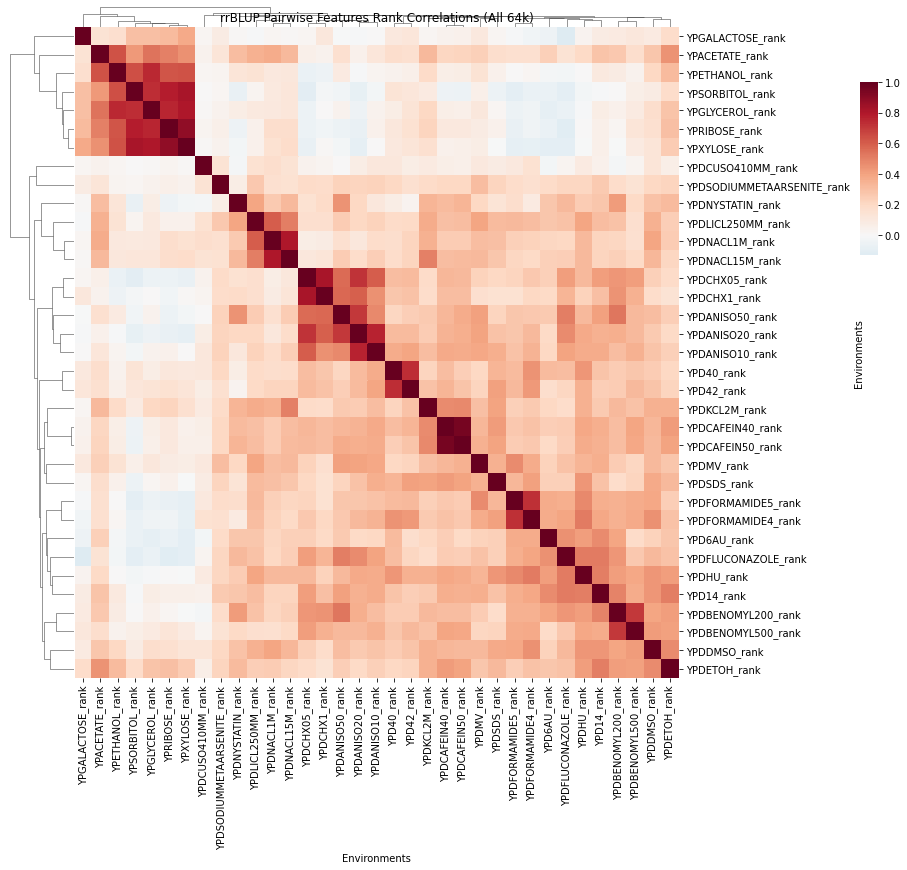

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

fig=sns.clustermap(rank_corr, figsize=(12,12),center=0,cmap="RdBu_r",cbar_pos=(1, .7, 0.02, .2),dendrogram_ratio=(.1, .03),)
ax = fig.ax_heatmap
ax.set_xlabel("Environments")
ax.set_ylabel("Environments")
ax.set_title("rrBLUP Pairwise Features Rank Correlations (All 64k)")
plt.tight_layout(rect=[0, 0.7, 0, 0.7]) # left, bottom, right, top
plt.show(ax)

#### Feature coefficient distributions

array([[<AxesSubplot:title={'center':'YPRIBOSE'}>,
        <AxesSubplot:title={'center':'YPDHU'}>,
        <AxesSubplot:title={'center':'YPDNACL1M'}>,
        <AxesSubplot:title={'center':'YPDCAFEIN40'}>,
        <AxesSubplot:title={'center':'YPGLYCEROL'}>,
        <AxesSubplot:title={'center':'YPDANISO50'}>],
       [<AxesSubplot:title={'center':'YPDMV'}>,
        <AxesSubplot:title={'center':'YPDANISO20'}>,
        <AxesSubplot:title={'center':'YPD40'}>,
        <AxesSubplot:title={'center':'YPDFORMAMIDE5'}>,
        <AxesSubplot:title={'center':'YPDBENOMYL200'}>,
        <AxesSubplot:title={'center':'YPDFLUCONAZOLE'}>],
       [<AxesSubplot:title={'center':'YPACETATE'}>,
        <AxesSubplot:title={'center':'YPDCAFEIN50'}>,
        <AxesSubplot:title={'center':'YPDDMSO'}>,
        <AxesSubplot:title={'center':'YPDSDS'}>,
        <AxesSubplot:title={'center':'YPD14'}>,
        <AxesSubplot:title={'center':'YPDNYSTATIN'}>],
       [<AxesSubplot:title={'center':'YPDCHX05'}>,
        <A

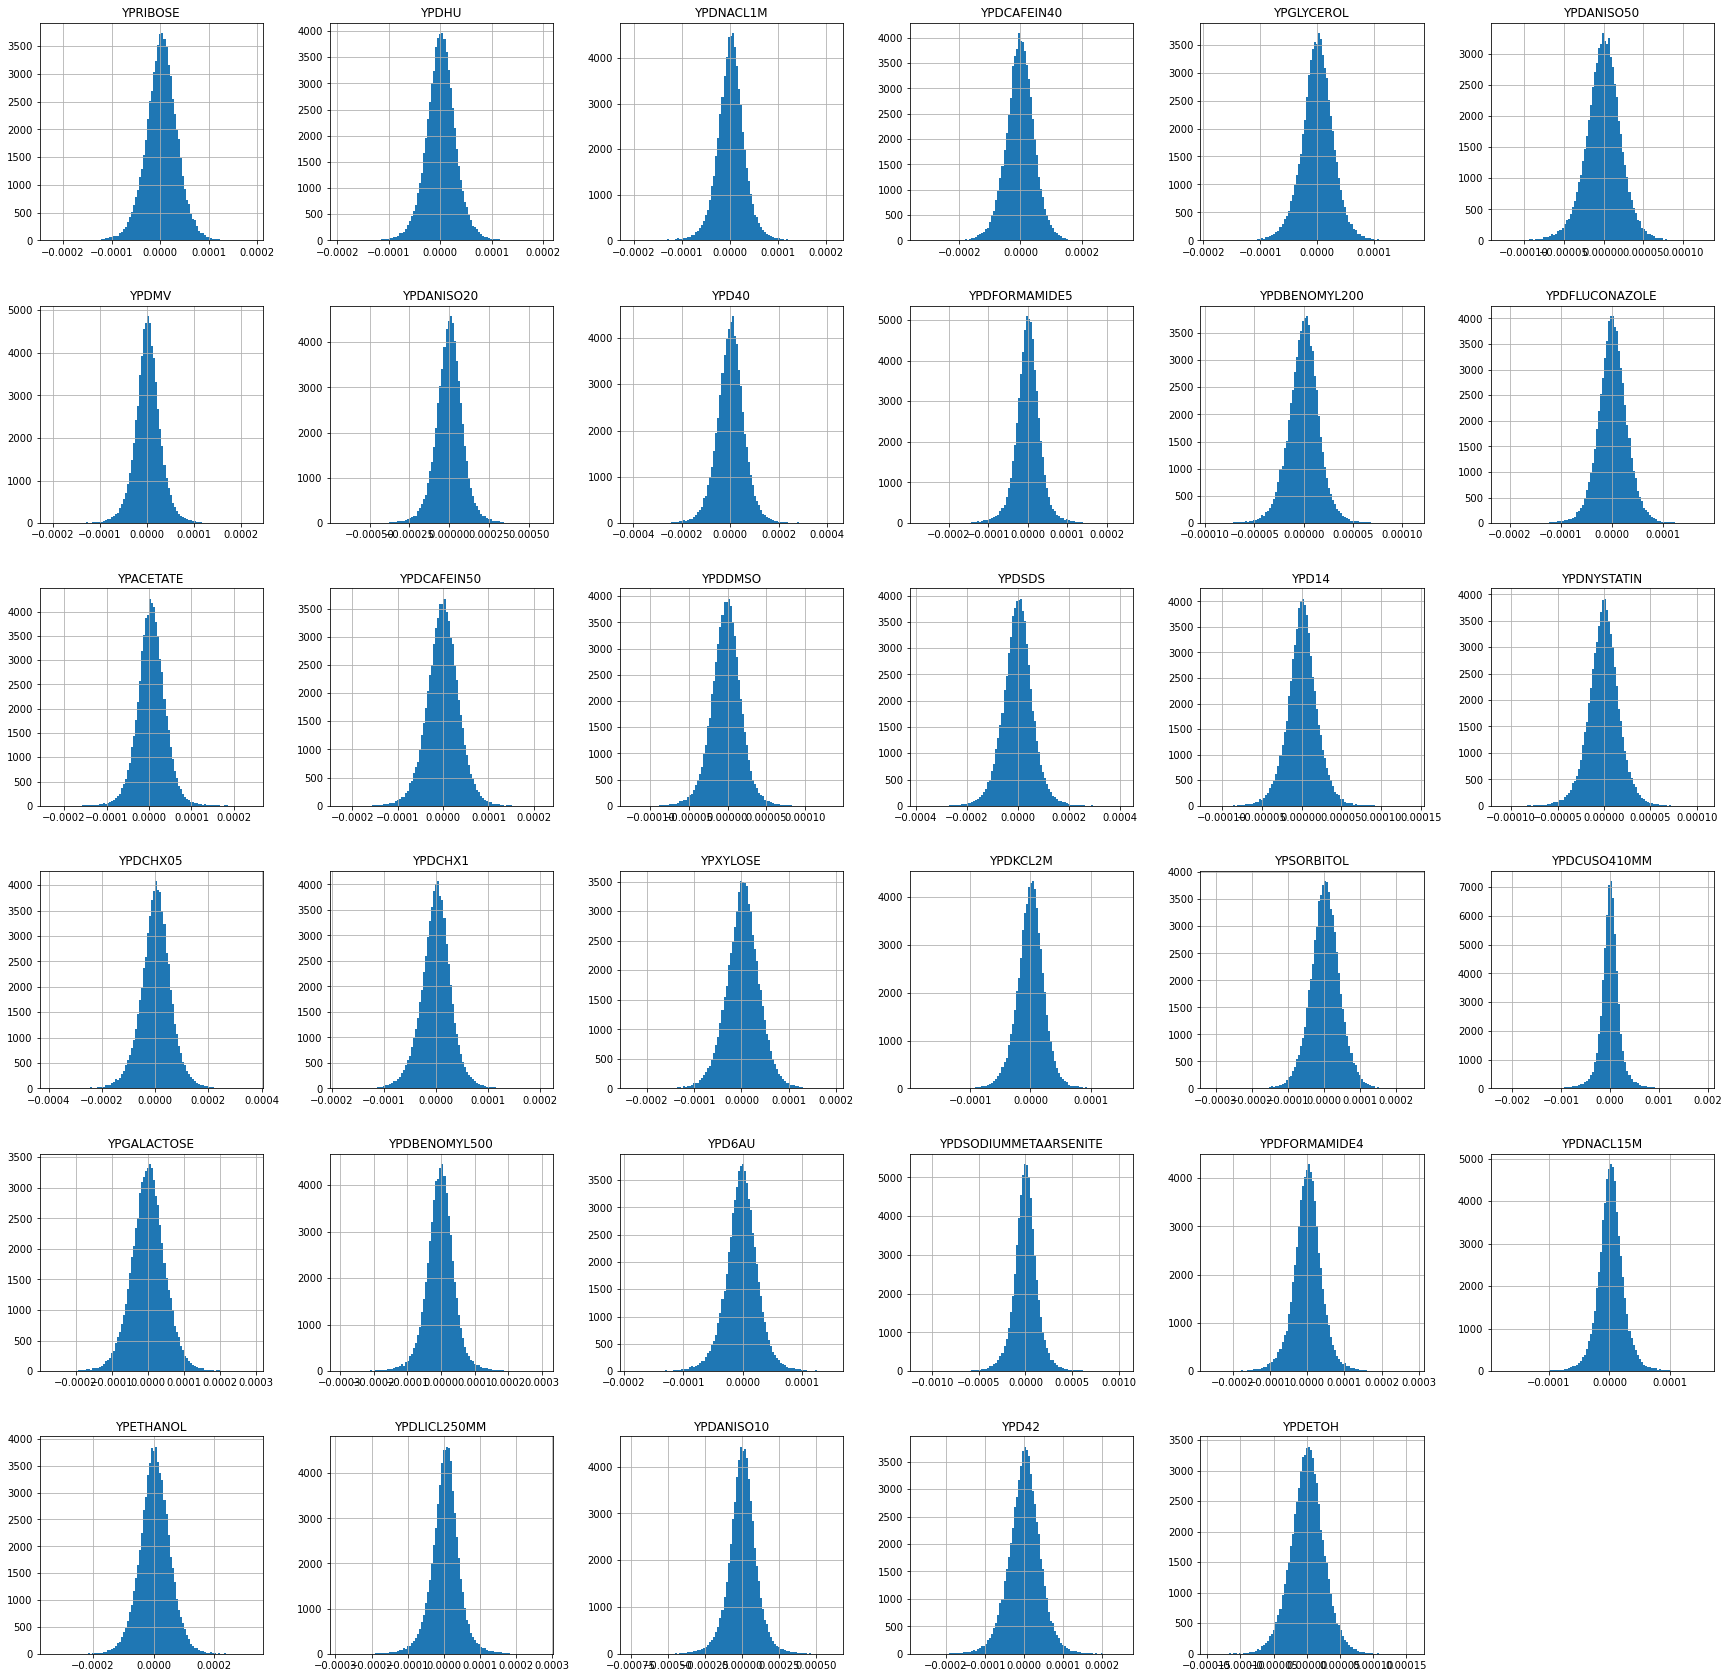

In [ ]:
ax = rrblup.hist(figsize=(30,30),bins=100, xlabelsize=14, ylabelsize=14, grid=False, xrot=90)
plt.savefig("/mnt/home/seguraab/Shiu_Lab/Project/Scripts/Genomic_Prediction_rrBLUP/rrblup_coef_distributions.pdf")

<AxesSubplot:>

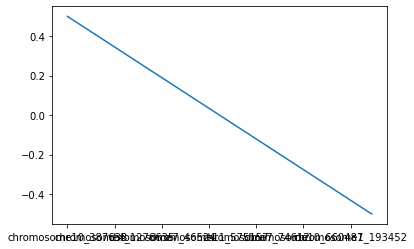

In [29]:
# Min-max normalization of data columns
rank_inv_norm = (rank_inv - rank_inv.mean()) / (rank_inv.max() - rank_inv.min())
rank_inv_norm.YPRIBOSE_rank.plot()

### RF

In [33]:
# Random forest feature importance scores (64k baseline model)
import pandas as pd
import datatable as dt
dir = "/mnt/gs18/scratch/users/seguraab/yeast_project/yeast_rf_results/"
rf={}
rf_rank={}
rf_rank_inv={}
print("Progress:", end = " ")
for f in envs:
    imp = dt.fread("%sfeat_rf_%s_top_RFScores.txt"%(dir,f)).to_pandas()
    imp = imp.set_index('C0') # snp ids as index
    imp = imp.set_axis([f], axis=1) # set col name to f
    rf[f] = imp[f] # feature importance scores
    rf_rank["%s_rank"%f] = range(1,1+len(imp[f])) # feature ranks
    #rf_rank_inv["%s_rank"%f] = abs(((rf_rank["%s_rank"%f].value() - 1)/(len(imp[f]) - 1)) - 1)
    print("•", end = " ")
rf = pd.DataFrame(rf)
rf_rank = pd.DataFrame(rf_rank)
#rf_rank_inv = pd.DataFrame(rf_rank_inv)

Progress: • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • • 